In [1]:
import numpy as np 
import pandas as pd
from epiweeks import Week
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

In [2]:
dates_25 = pd.date_range(start= Week(2024, 41).startdate().strftime('%Y-%m-%d'),
              end= Week(2025, 40).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

In [3]:
df = pd.read_csv('./predictions/preds_21_AM_2025.csv.gz')
df.date = pd.to_datetime(df.date)
df = df.loc[df.date.isin(dates_25)]
df.head()

,date,pred,lower,upper,adm_0,adm_1,adm_2,adm_3
0,2024-10-06,2.448956,0.000000,10.572246,BRA,AM,NaN,NaN
1,2024-10-13,36.220227,18.395518,58.050820,BRA,AM,NaN,NaN
2,2024-10-20,6.113500,0.000000,20.626536,BRA,AM,NaN,NaN
3,2024-10-27,10.054739,2.650930,22.254004,BRA,AM,NaN,NaN
4,2024-11-03,57.966262,37.272050,89.608984,BRA,AM,NaN,NaN


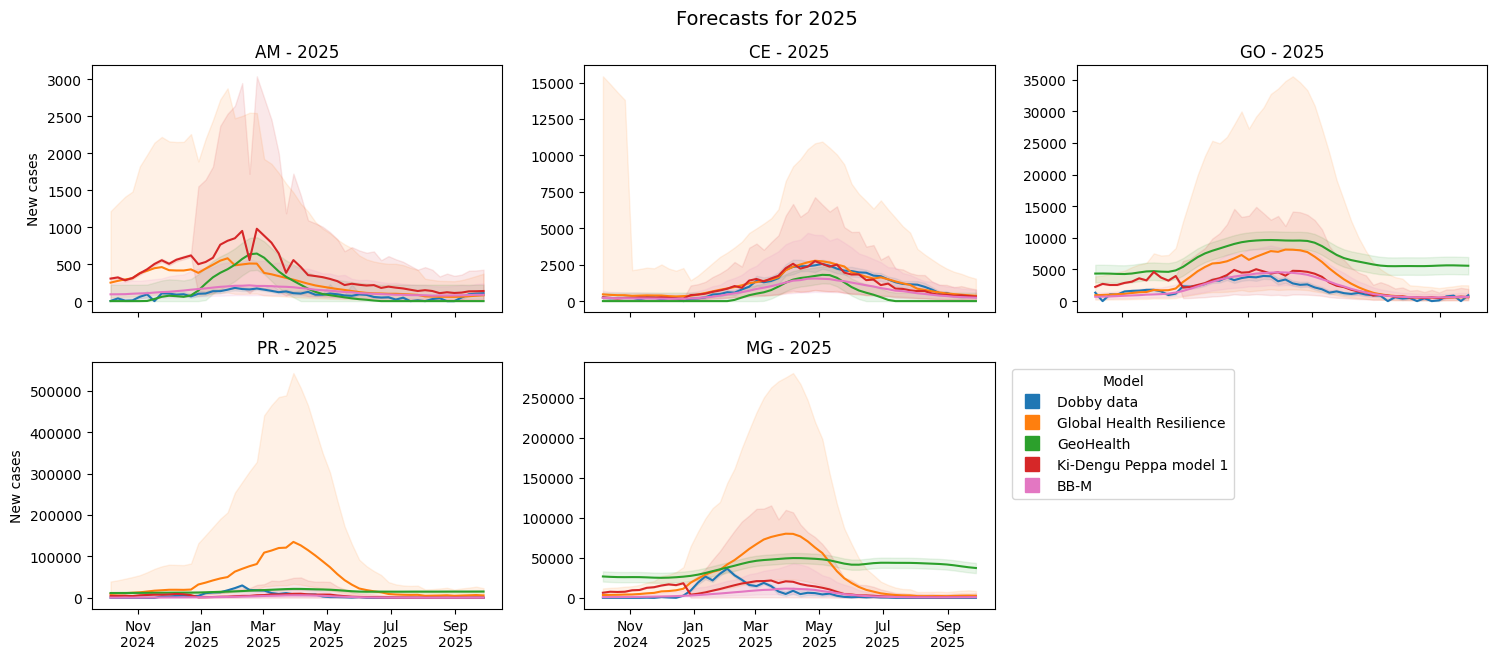

In [5]:
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(2, 6, figure=fig)
    
# First row with three boxplots
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
    
# Second row with two boxplots
ax4 = fig.add_subplot(gs[1, 0:2])
ax5 = fig.add_subplot(gs[1, 2:4])

custom_lines = []

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:pink']
model_ids = [21, 22, 25, 27, 30]
    
model_legend = [ 'Dobby data', 'Global Health Resilience', 
                    'GeoHealth', 'Ki-Dengu Peppa model 1', 'BB-M']

for c in colors: 
    
    custom_lines.append(Line2D([0], [0], color=c, marker='s', linestyle='None', markersize=10))


i = 0

for state, ax  in zip(['AM', 'CE', 'GO', 'PR', 'MG'],
                      [ax1,ax2,ax3,ax4,ax5]): 


    for model_id, color in zip(model_ids,
                                   colors):
         
        df = pd.read_csv(f'./predictions/preds_{model_id}_{state}_2025.csv.gz')
        df.date = pd.to_datetime(df.date)
        df = df.loc[df.date.isin(dates_25)]

        ax.plot(df.date, df.pred, color = color)
        ax.fill_between(df.date, df.lower, df.upper, color = color, alpha = 0.1)
         
        ax.set_title(f'{state} - 2025')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Format as 'Jan 22'

    i = i +1

ax5.legend(custom_lines, model_legend, title ='Model', bbox_to_anchor=(1.5
                                                                       , 0.5, 0.1, 0.5))
plt.subplots_adjust(wspace = 0.5)
#plt.tight_layout()
# Rotate the date labels for better readability
fig.autofmt_xdate(rotation=0, ha='center')

ax1.set_ylabel('New cases')
ax4.set_ylabel('New cases')
plt.suptitle('Forecasts for 2025', y=0.95, fontsize = 14)

plt.savefig('forecasts_2025.png', dpi = 300, bbox_inches = 'tight')
plt.show()